# Main analysis notebook

Load data from experiments and plot learning curves for minimal pairs of quantifiers satisfying universal vs. not.

In [9]:
import pandas as pd
import plotnine as pn

## Load data

By loading the large csv file from [data/all_data.csv](data/all_data.csv), which contains the combined results from all experiments, in tidy format.

In [11]:
all_data = pd.read_csv("../../data/experiments/all_data.csv")
all_data

,train_losses,train_accuracies,test_losses,test_accuracies,epoch,quantifier,num_states,max_epochs,batch_size,learning_rate,seed
0,6.931187e-01,0.518008,6.927910e-01,0.640741,1,at_most_three,10,1000.0,8,0.001,1
1,6.914495e-01,0.599576,6.893817e-01,0.640741,2,at_most_three,10,1000.0,8,0.001,1
2,6.852597e-01,0.649894,6.811783e-01,0.640741,3,at_most_three,10,1000.0,8,0.001,1
3,6.748346e-01,0.649894,6.697445e-01,0.640741,4,at_most_three,10,1000.0,8,0.001,1
4,6.626970e-01,0.649894,6.596256e-01,0.640741,5,at_most_three,10,1000.0,8,0.001,1
...,...,...,...,...,...,...,...,...,...,...,...
15095,5.722002e-10,1.000000,3.516350e-10,1.000000,996,at_least_four,10,1000.0,8,0.001,3
15096,4.137719e-10,1.000000,3.493003e-10,1.000000,997,at_least_four,10,1000.0,8,0.001,3
15097,4.131691e-10,1.000000,7.196339e-10,1.000000,998,at_least_four,10,1000.0,8,0.001,3
15098,4.125652e-10,1.000000,4.233337e-10,1.000000,999,at_least_four,10,1000.0,8,0.001,3


In [23]:
all_data = all_data[all_data["epoch"] <= 250]

## Experiment 1a

In [24]:
df_1a = all_data[all_data["quantifier"].isin(["at_least_six_or_at_most_two", "at_least_four"])]

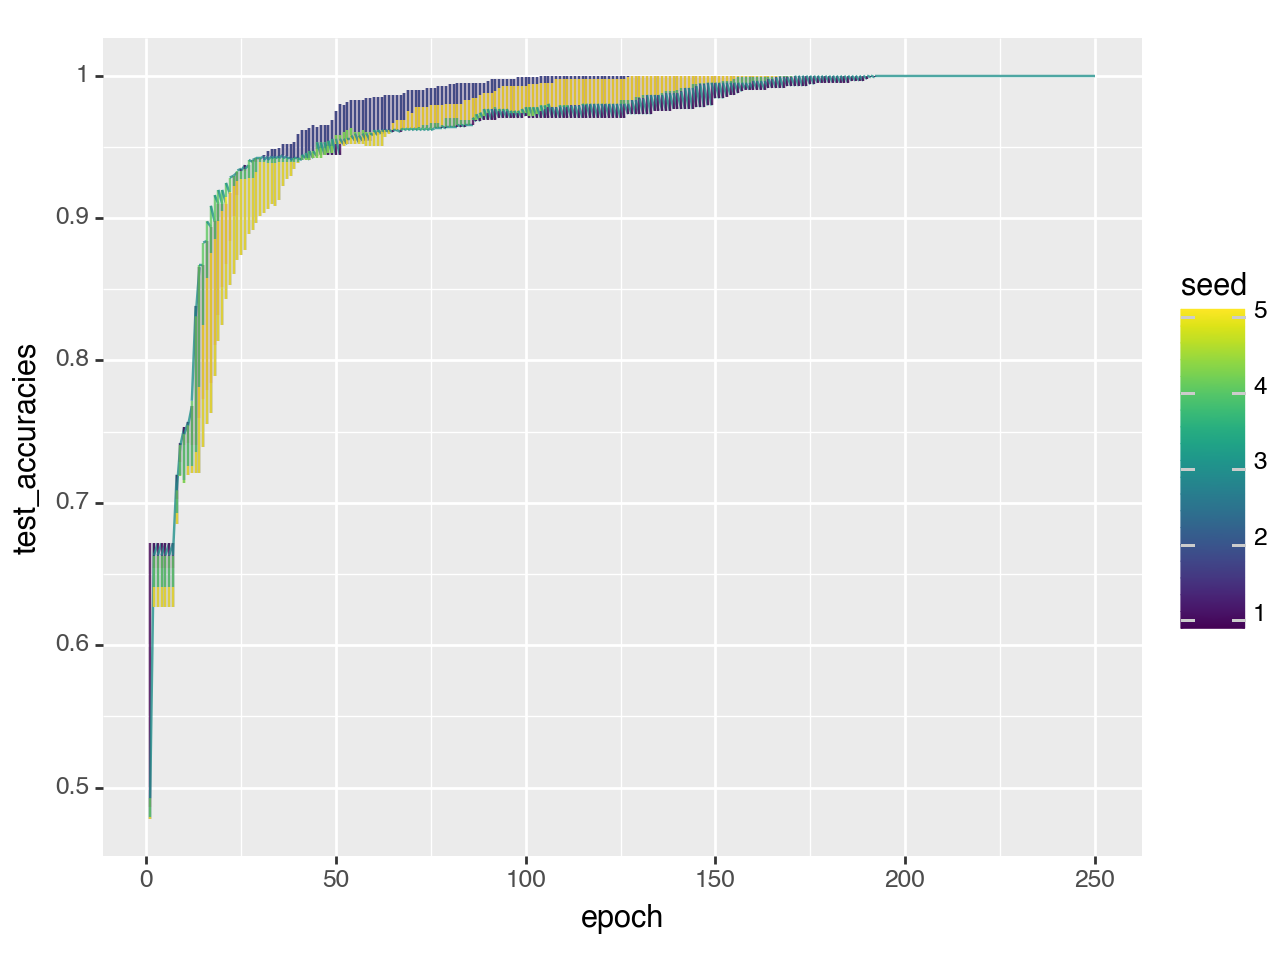

<Figure Size: (640 x 480)>

In [25]:
(
    pn.ggplot(df_1a[df_1a["quantifier"] == "at_least_four"], pn.aes(x="epoch"))
    + pn.geom_line(mapping=pn.aes(y="test_accuracies", color="seed"), alpha=0.8)
)

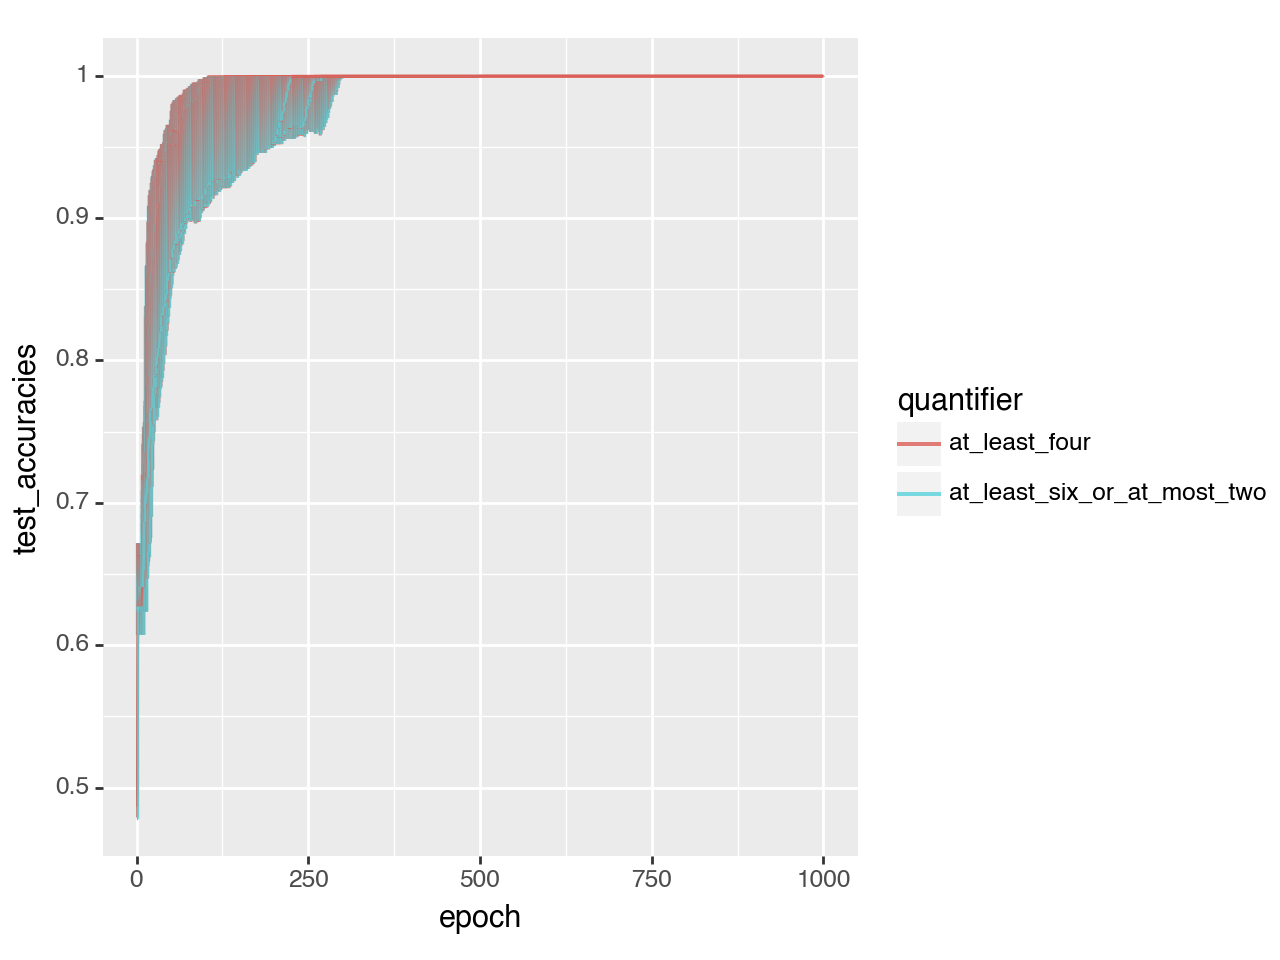

<Figure Size: (640 x 480)>

In [21]:
(
    pn.ggplot(df_1a, pn.aes(x="epoch"))
    + pn.geom_point(mapping=pn.aes(y="test_accuracies", color="quantifier", group = "seed"), alpha=0.8)
)